## Exercise 1 - Scottish lakes

In [1]:
Lake_names <- c("Loch Ness", "Loch Lomond", "Loch Morar", "Loch Tay", "Loch Awe", "Loch Maree", "Loch Ericht", "Loch Lochy", "Loch Rannoch", "Loch Shiel", "Loch Katrine", "Loch Arkaig", "Loch Shin")
Volume <- c(7.45, 2.6, 2.3, 1.6, 1.2, 1.09, 1.08, 1.07, 0.97, 0.79, 0.77, 0.75, 0.35)
Area <- c(39, 71, 27, 26.4, 39, 28.6, 18.6, 16, 19, 19.5, 12.4, 16, 22.5)
Length <- c(56, 36, 18.8, 23, 41, 20, 23, 16, 15.7, 28, 12.9, 19.3, 27.8)
Max_depth <- c(230, 190, 310, 150, 94, 114, 156, 162, 134, 128, 151, 109, 49)
Mean_depth <-c(132, 37, 87, 60.6, 32, 38, 57.6, 70, 51, 40, 43.4, 46.5, 15.5)
scottish.lakes <- data.frame(Lake_names, Volume, Area, Length, Max_depth, Mean_depth)
scottish.lakes

Lake_names,Volume,Area,Length,Max_depth,Mean_depth
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Loch Ness,7.45,39.0,56.0,230,132.0
Loch Lomond,2.60,71.0,36.0,190,37.0
Loch Morar,2.30,27.0,18.8,310,87.0
Loch Tay,1.60,26.4,23.0,150,60.6
Loch Awe,1.20,39.0,41.0,94,32.0
Loch Maree,1.09,28.6,20.0,114,38.0
Loch Ericht,1.08,18.6,23.0,156,57.6
Loch Lochy,1.07,16.0,16.0,162,70.0
Loch Rannoch,0.97,19.0,15.7,134,51.0


### 1.1. Evaluate the highest and lowest volume and area lake

In [2]:
max_vol_l <- which.max(scottish.lakes$Volume)
min_vol_l <- which.min(scottish.lakes$Volume)
max_area_l <- which.max(scottish.lakes$Area)
min_area_l <- which.min(scottish.lakes$Area)
message('The max volume lake is ',scottish.lakes$Lake_names[max_vol_l], ' with ',scottish.lakes$Volume[max_vol_l], ' km³')
message('The min volume lake is ',scottish.lakes$Lake_names[min_vol_l], ' with ',scottish.lakes$Volume[min_vol_l], ' km³')
message('The max area lake is ',scottish.lakes$Lake_names[max_area_l], ' with ',scottish.lakes$Area[max_area_l], ' km²')
message('The min area lake is ',scottish.lakes$Lake_names[min_area_l], ' with ',scottish.lakes$Area[min_area_l], ' km²')

The max volume lake is Loch Ness with 7.45 km³

The min volume lake is Loch Shin with 0.35 km³

The max area lake is Loch Lomond with 71 km²

The min area lake is Loch Katrine with 12.4 km²



### 1.2 Order the frame with respect to the area and determine the two largest area lakes

In [3]:
ordered <- scottish.lakes[order(scottish.lakes$Area, decreasing = TRUE),]
biggest <- ordered[1:2,]
message('The biggest lakes are:')
for (i in 1:2){
    message(i,'. ', biggest[i,1], ' with ', biggest[i,3], ' km²')
}

The biggest lakes are:

1. Loch Lomond with 71 km²

2. Loch Ness with 39 km²



### 1.3 By summing up the areas occpupied by the lakes, determine the area of Scotland covered by water

In [4]:
lake_area <- sum(scottish.lakes$Area)
message('At least ', lake_area,'km² are covered by water in Scotland')

At least 355km² are covered by water in Scotland



## Exercise 2 - Crude oil production

### 2.1. Write R code that is able to read the file and import it in a data frame structure.

In [5]:
oil <- as.data.frame(read.csv('crude-oil-prices.csv', comment.char = '#'))
# For display purposes, sampling only 20 elements from the dataframe
oil[sample(1:nrow(oil),20),]

,Entity,Code,Year,OilPrice
,<fct>,<fct>,<int>,<dbl>
32,World,OWID_WRL,1892,0.56000
87,World,OWID_WRL,1947,1.90000
149,World,OWID_WRL,2009,61.67126
33,World,OWID_WRL,1893,0.64000
118,World,OWID_WRL,1978,14.02000
142,World,OWID_WRL,2002,25.02326
58,World,OWID_WRL,1918,1.98000
54,World,OWID_WRL,1914,0.81000
88,World,OWID_WRL,1948,1.99000


### 2.2. Produce a plot with the Oil price as a function of the year

In [6]:
library(ggplot2)

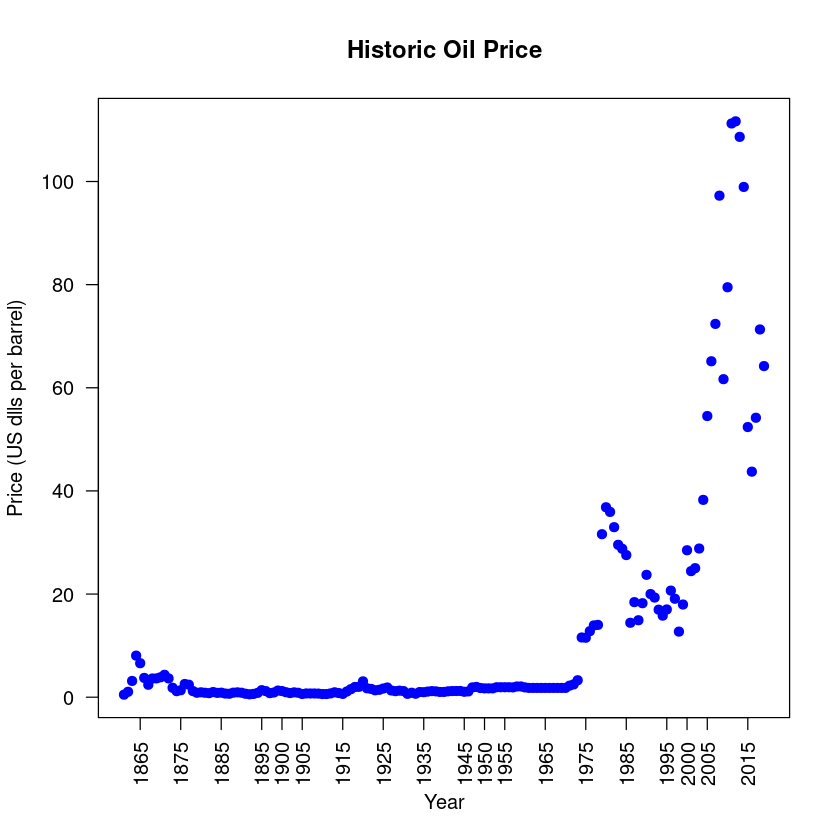

In [7]:
plot(oil[,3], oil[,4], main = 'Historic Oil Price', xlab = 'Year', ylab = 'Price (US dlls per barrel)', col = 'blue', pch = 19, las = 2)
axis(side = 1, at = oil[seq(5,length(oil[,3]),10),3],las = 2)

### 2.3. Which is the highest price in history ? When did it occur ?

In [8]:
library(ramify)


Attaching package: ‘ramify’


The following object is masked from ‘package:graphics’:

    clip




In [9]:
h_ins <- which.max(oil[,4])
when <- oil[h_ins,3]
h_price <- oil[h_ins,4]
message('The highest oil price in history was ', round(h_price,2), ' US dollars per barrel, during ', when, '.')

The highest oil price in history was 111.67 US dollars per barrel, during 2012.



### 2.4. Plot the derivative of the yearly price per barrel

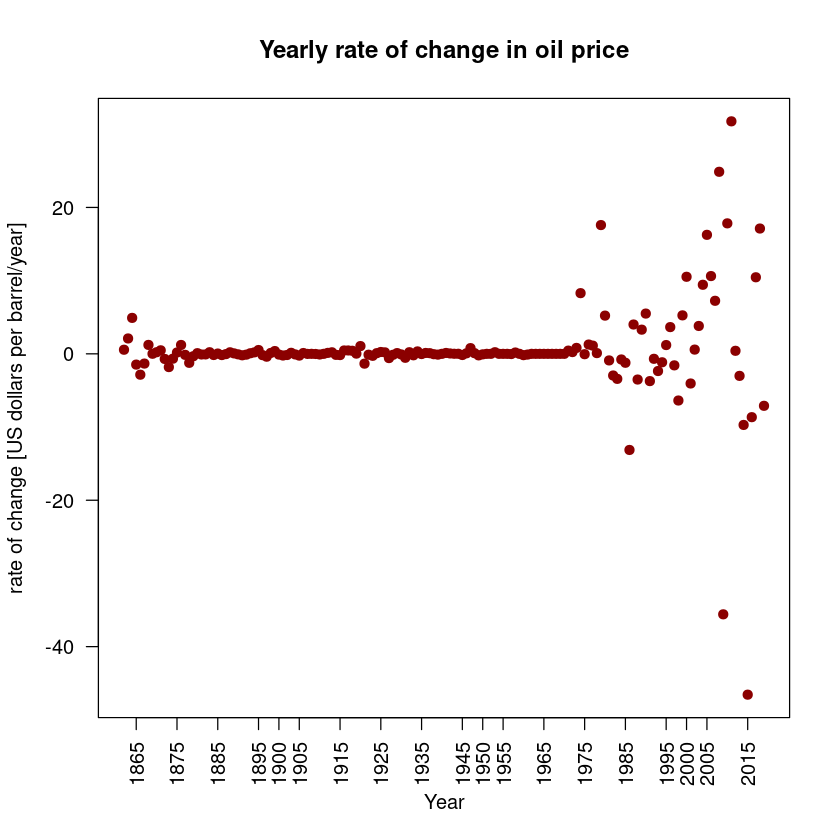

In [10]:
f_derivative <- function(x){
    d <- x[2:length(x)] - x[1:length(x)-1]
    return(d)
}

d <- f_derivative(oil[,4])
years <- oil[2:length(oil[,3]),3]

plot(years, d, main = 'Yearly rate of change in oil price', xlab = 'Year', ylab = 'rate of change [US dollars per barrel/year]', col = "darkred", pch = 19, las = 2)
axis(side = 1, at = years[seq(4,length(years),10)],las = 2)


## Exercise 3 - World Coal Production

### 3.1. Write R code that is able to read the file and import it in a tibble [4] structure

In [11]:
coal_file <- "coal-production-by-country.csv"
library(tidyverse)
coal_data <- read_csv(coal_file)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ tibble  3.1.0     ✔ dplyr   1.0.5
✔ tidyr   1.1.3     ✔ stringr 1.4.0
✔ readr   1.4.0     ✔ forcats 0.5.1
✔ purrr   0.3.3     

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ tidyr::fill()    masks ramify::fill()
✖ dplyr::filter()  masks stats::filter()
✖ purrr::flatten() masks ramify::flatten()
✖ dplyr::lag()     masks stats::lag()


── Column specification ────────────────────────────────────────────────────────
cols(
  Entity = col_character(),
  Code = col_character(),
  Year = col_double(),
  `Coal production (TWh)` = col_double()
)




In [12]:
coal_data[sample(1:nrow(coal_data),20),]

Entity,Code,Year,Coal production (TWh)
<chr>,<chr>,<dbl>,<dbl>
Europe,NA,1963,5824.297
Nepal,NPL,1961,0.000
Guinea,GIN,2001,0.000
Middle East,NA,1915,0.000
French Polynesia,PYF,1996,0.000
Montenegro,MNE,2006,4.075
Indonesia,IDN,1951,7.066
Mauritania,MRT,1983,0.000
OPEC,NA,2002,72.170


In [13]:
# Removing "region integrated" entries. These lack a code.
# Entries with a non-empty code column belong to specific countries.
library(stringr)
coal_data <- coal_data[!is.na(coal_data$Code) & !str_detect(coal_data$Code, 'OWID'),]
coal_data[sample(1:nrow(coal_data),20),]

Entity,Code,Year,Coal production (TWh)
<chr>,<chr>,<dbl>,<dbl>
Saint Pierre and Miquelon,SPM,1990,0.000
Guyana,GUY,1994,0.000
Japan,JPN,2018,6.669
Cuba,CUB,1993,0.000
Saint Helena,SHN,1985,0.000
Afghanistan,AFG,1906,0.000
Ethiopia,ETH,1983,0.000
North Korea,PRK,1947,0.000
Tanzania,TZA,1994,0.347


### 3.2. Count the number of countries available in the file and produce a barplot with the number of entries for each country

In [14]:
countries <- unlist(unique(coal_data['Entity']))
n_countries <- length(countries)
message('There are ', n_countries, ' countries in the dataset.')

obs <- as.numeric(lapply(countries, function(x){nrow(coal_data[which(coal_data['Entity'] == x),])}))
new_order <- order(obs, decreasing = TRUE)
obs<- obs[new_order]
countries <- countries[new_order]

There are 171 countries in the dataset.



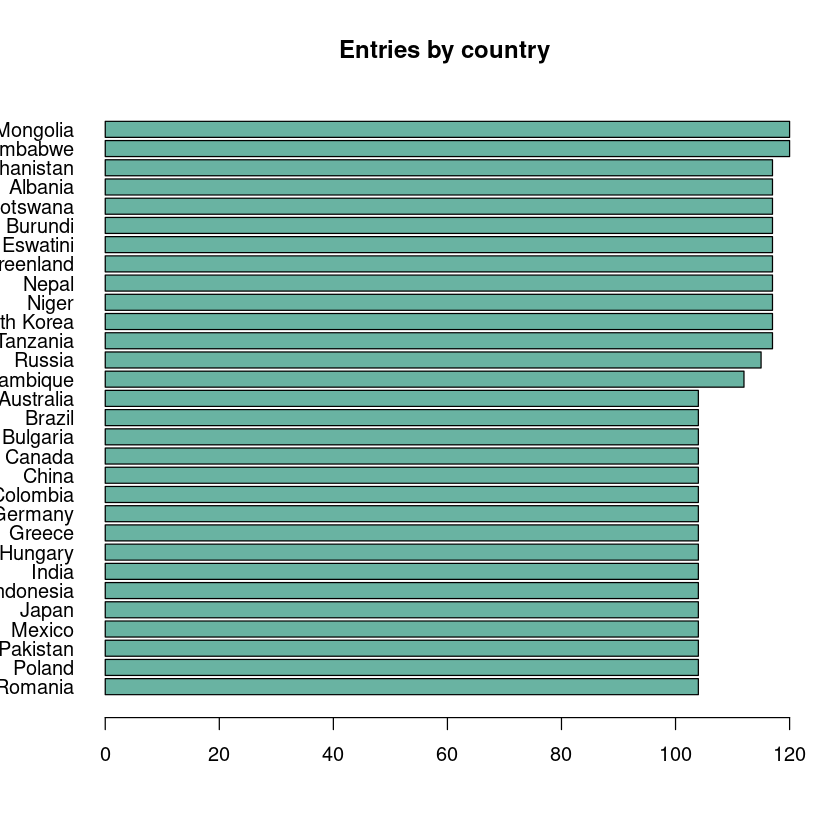

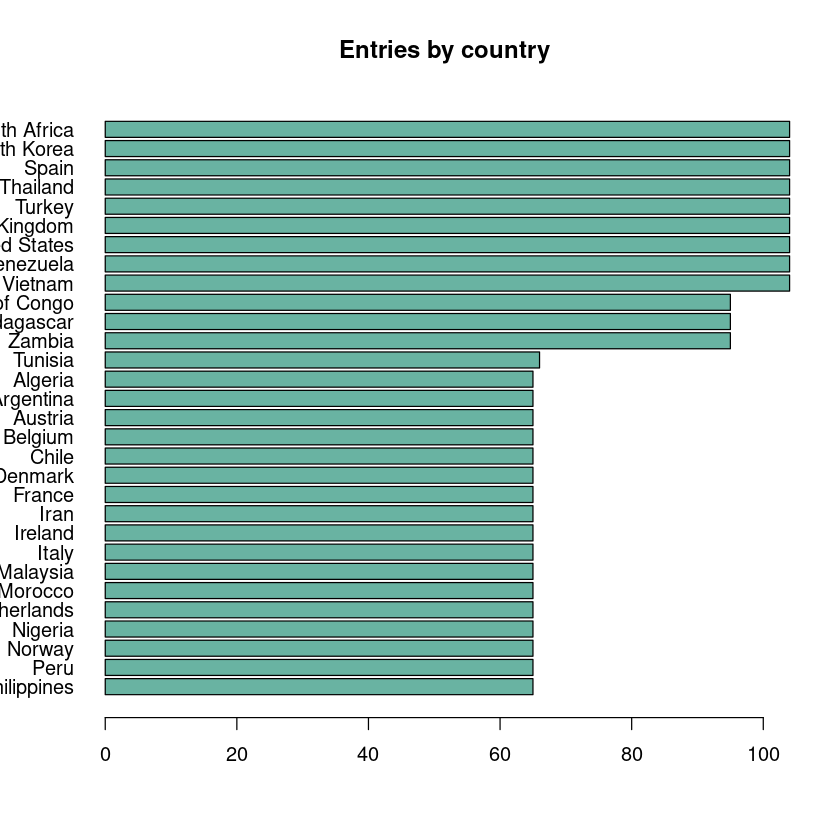

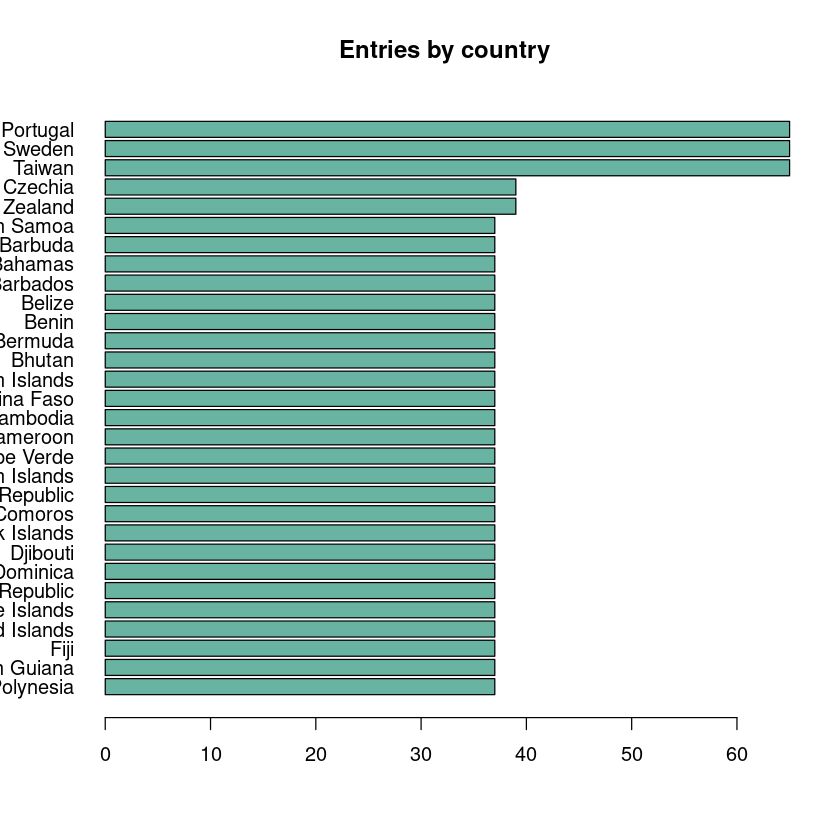

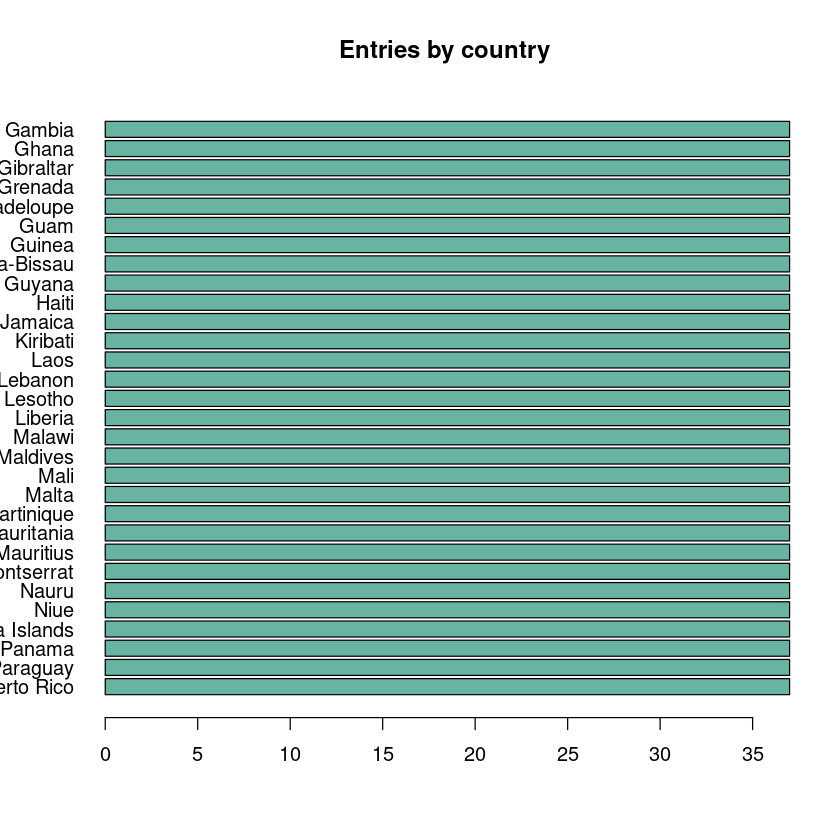

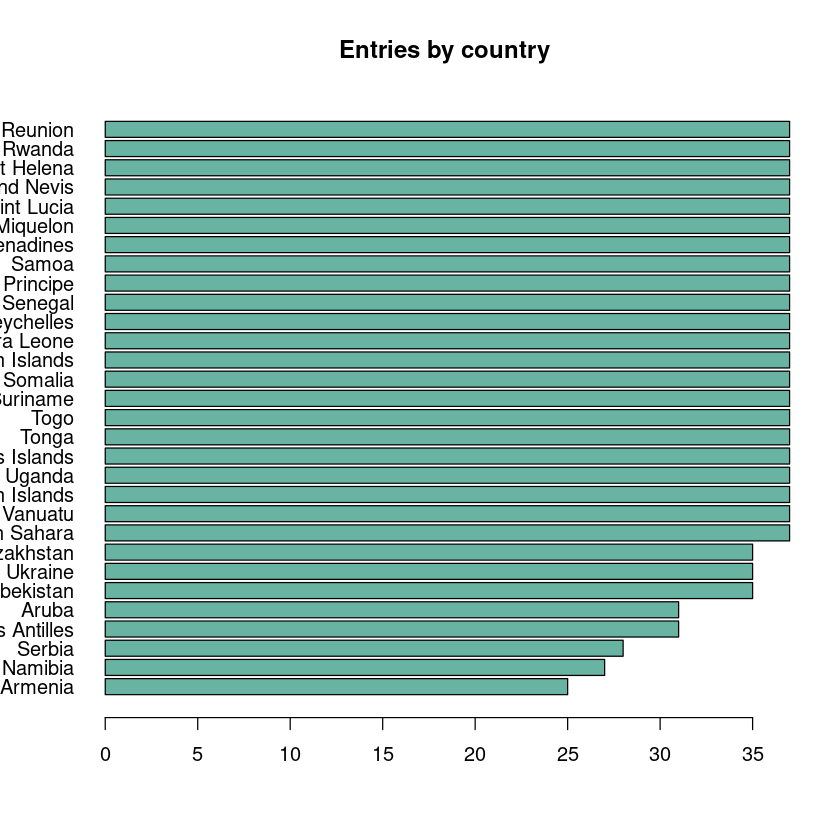

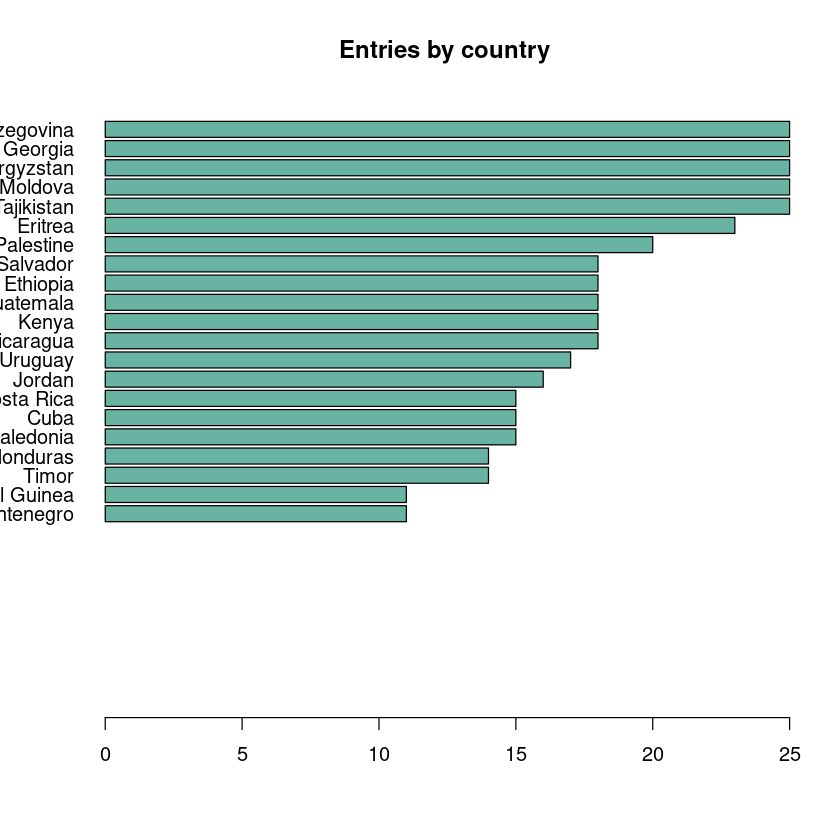

In [15]:
# Looping over chunks of countries for visualization purposes.
for (i in seq(1,n_countries,30)){
    barplot(obs[(i+29):i], main = 'Entries by country', names.arg = countries[(i+29):i], horiz = TRUE, las = 1, col = "#69b3a2")
}

### 3.3. Selecting only the years after 1970, determine the total integrated production for each country and print the top 5 Countries with highest coal productions

In [16]:
after_1970 <- filter(coal_data, coal_data['Year']>=1970)

In [17]:
production <- as.numeric(lapply(countries, function(x){sum(filter(coal_data, coal_data['Entity'] == x)['Coal production (TWh)'])}))
countries_production <- tibble(Country = countries, Production = production)

In [18]:
countries_production <- countries_production[order(countries_production['Production'],decreasing = TRUE),]
message('The top five countries are')
for (i in 1:5){
    country <- countries_production$Country[i]
    production <- countries_production$Production[i]
    message(i, '. ', country, ', with a ', round(production,0), 'TWh total production')
}

The top five countries are

1. China, with a 480890TWh total production

2. United States, with a 450350TWh total production

3. Russia, with a 176007TWh total production

4. United Kingdom, with a 115912TWh total production

5. Germany, with a 113268TWh total production



### 3.4. For the 5 top Countries, create a plot of production as a function of time

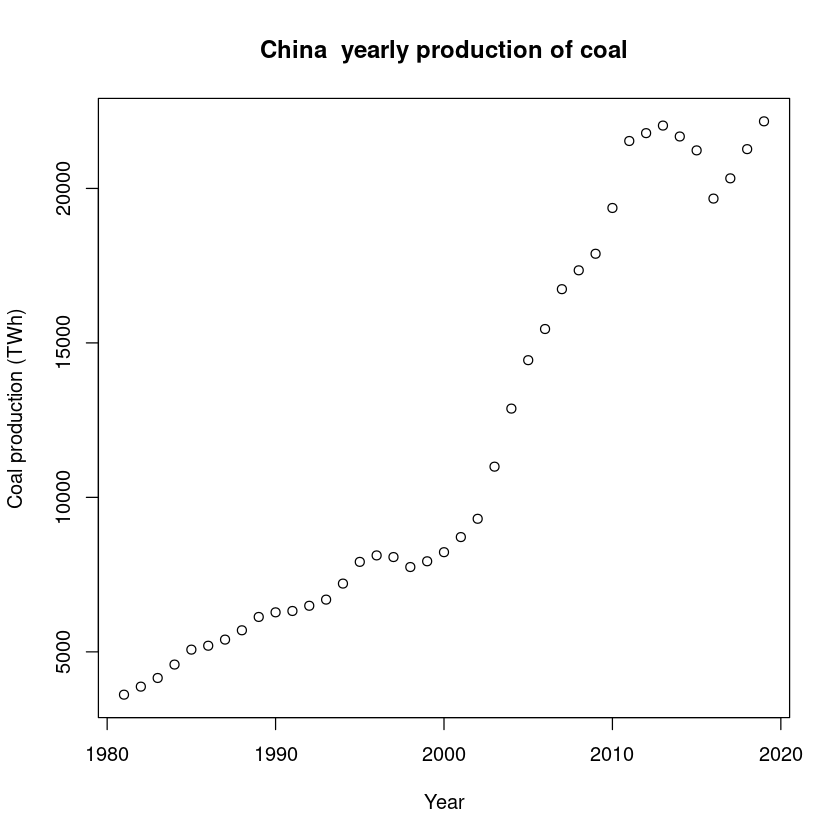

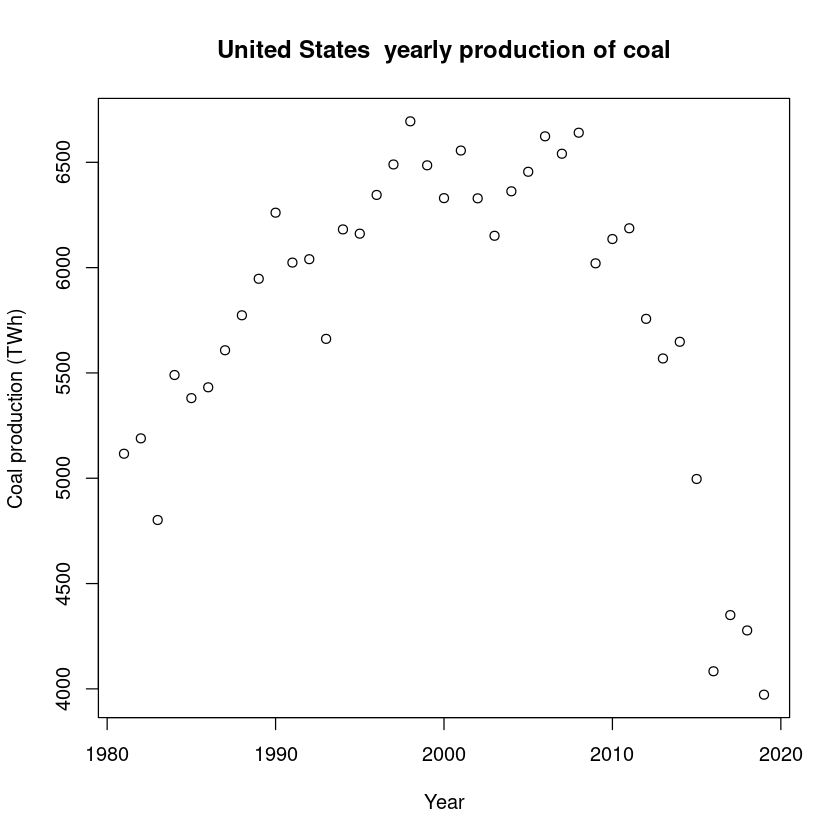

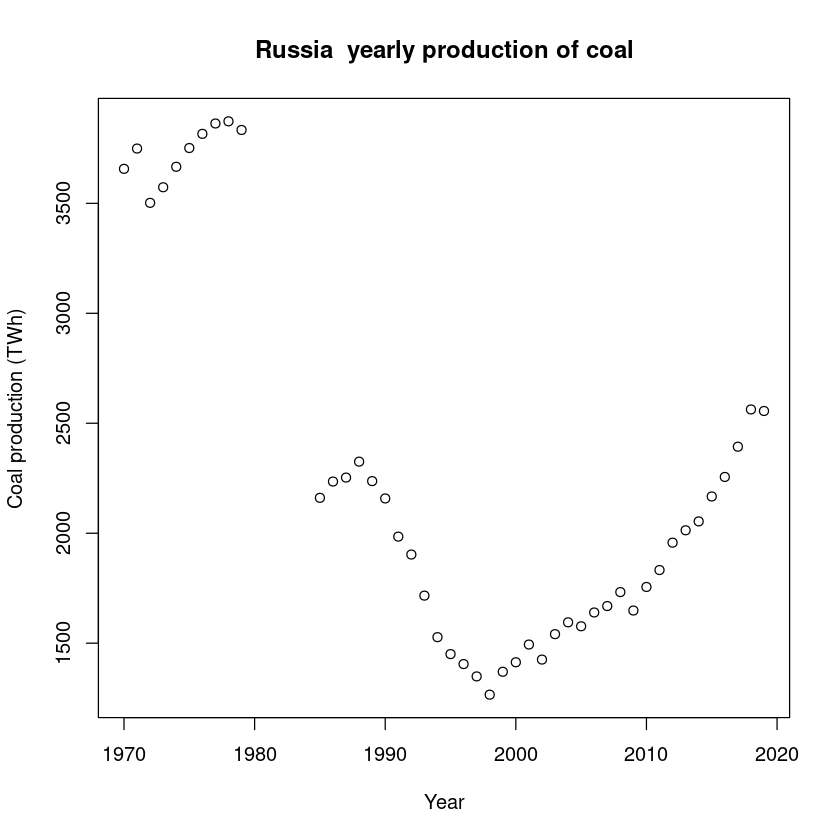

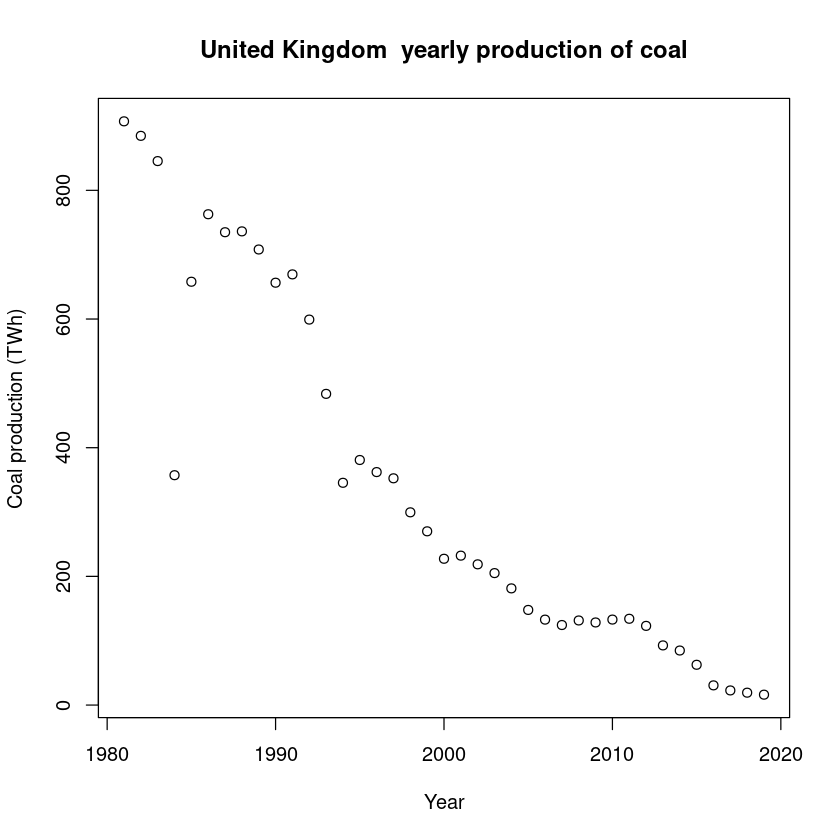

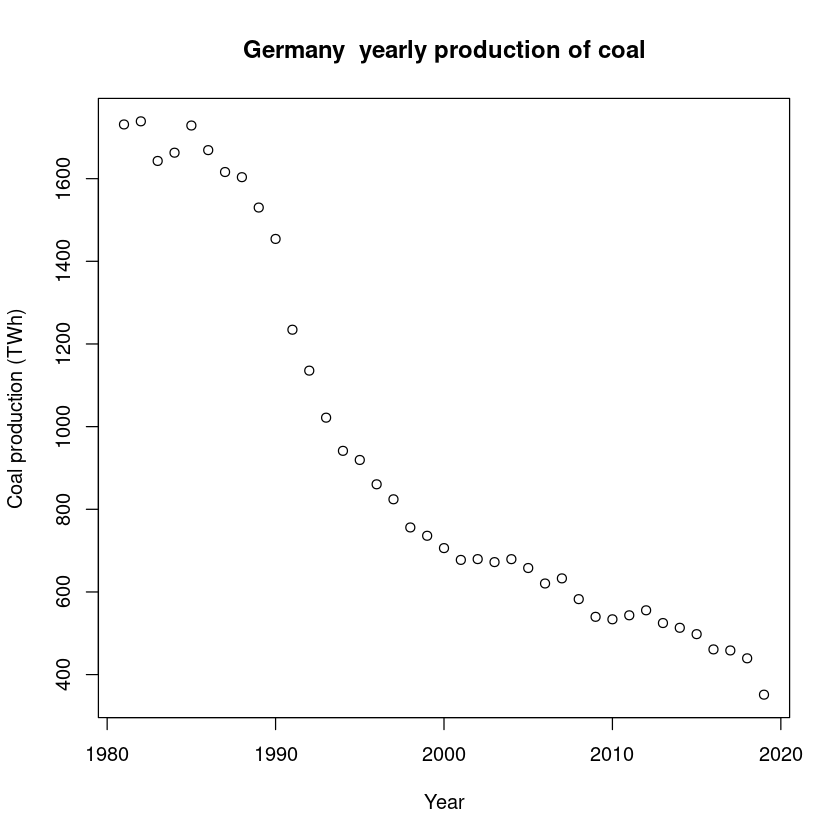

In [19]:
top_5 <- countries_production$Country[1:5]
for (country in top_5){
    country_data <- after_1970[which(after_1970$Entity == country),]
    years <- country_data$Year
    production <- t(country_data['Coal production (TWh)'])
    plot(years,production, main = paste(country, ' yearly production of coal'), xlab = 'Year', ylab = 'Coal production (TWh)')
}

### 3.5. Generate a plot with the cumulative sum of the World’s coal production over the years

In [20]:
sums <- aggregate(after_1970['Coal production (TWh)'], by = list(year = after_1970$Year), sum)

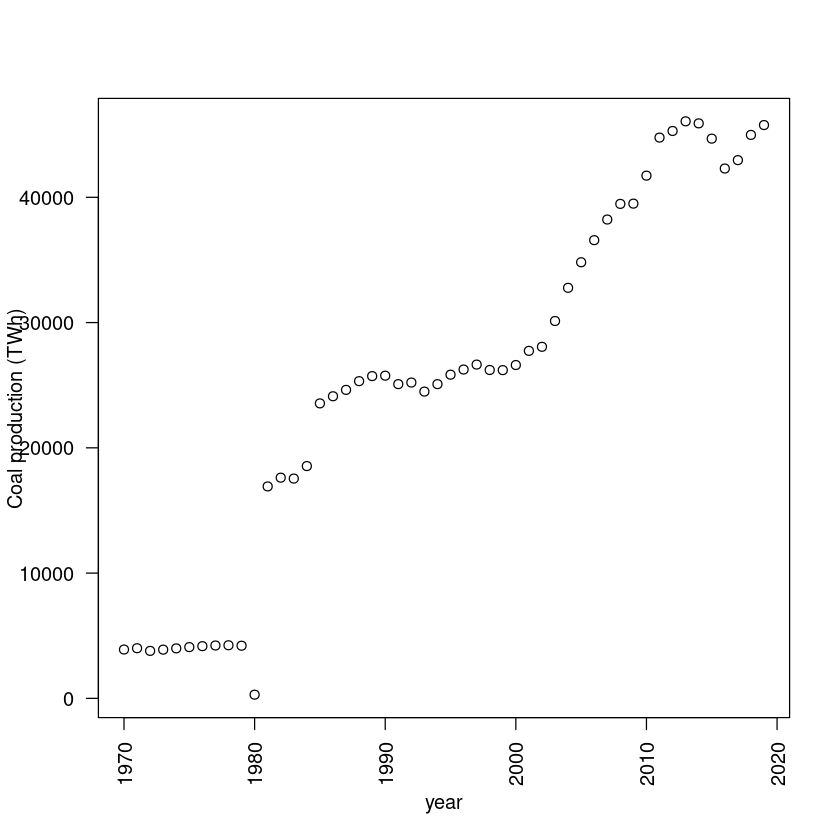

In [21]:
plot(sums, las = 2)

## Exercise 4 - COVID19 Vaccine Data

In [22]:
vax_by_manufacturer <- read_csv("https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/vaccinations/vaccinations-by-manufacturer.csv")
vax_by_manufacturer


── Column specification ────────────────────────────────────────────────────────
cols(
  location = col_character(),
  date = col_date(format = ""),
  vaccine = col_character(),
  total_vaccinations = col_double()
)




location,date,vaccine,total_vaccinations
<chr>,<date>,<chr>,<dbl>
Chile,2020-12-24,Pfizer/BioNTech,420
Chile,2020-12-25,Pfizer/BioNTech,5198
Chile,2020-12-26,Pfizer/BioNTech,8338
Chile,2020-12-27,Pfizer/BioNTech,8649
Chile,2020-12-28,Pfizer/BioNTech,8649
Chile,2020-12-29,Pfizer/BioNTech,8649
Chile,2020-12-30,Pfizer/BioNTech,8649
Chile,2020-12-31,Pfizer/BioNTech,8649
Chile,2021-01-01,Pfizer/BioNTech,8649


In [23]:
brand_shots <- function(country){
    country_vaccinations <- filter(vax_by_manufacturer, location == country)
    manufacturers <- unlist(unique(country_vaccinations$vaccine))
    dates <- unlist(unique(country_vaccinations$date))
    colors <- palette()[1:length(manufacturers)]
    manufacturer_vaccinations <- filter(country_vaccinations, vaccine == manufacturers[1])
    plot(manufacturer_vaccinations$date, manufacturer_vaccinations$total_vaccinations, col = colors[1], lty = 1)
    for (i in 2:length(manufacturers)){
        manufacturer_vaccinations <- filter(country_vaccinations, vaccine == manufacturers[i])
        points(manufacturer_vaccinations$date, manufacturer_vaccinations$total_vaccinations, col = colors[i], lty = i)
    }
    legend("topleft",legend = manufacturers, col = colors, lty = 1:length(manufacturers))
    total_per_day <- aggregate(country_vaccinations$total_vaccinations, by = list(country_vaccinations$date), sum)
    plot(total_per_day)
}

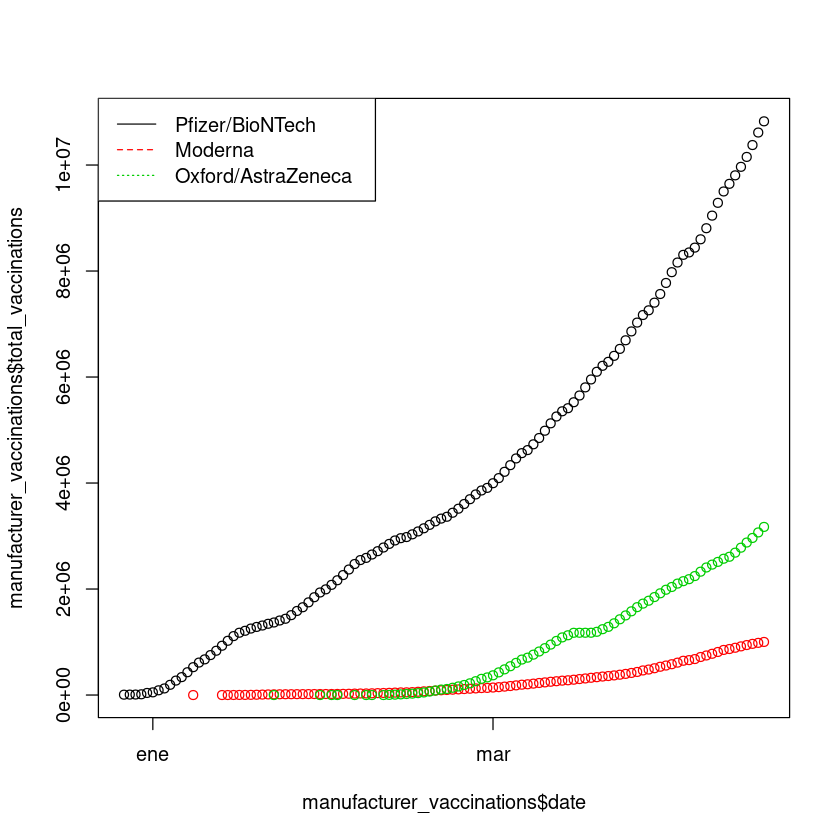

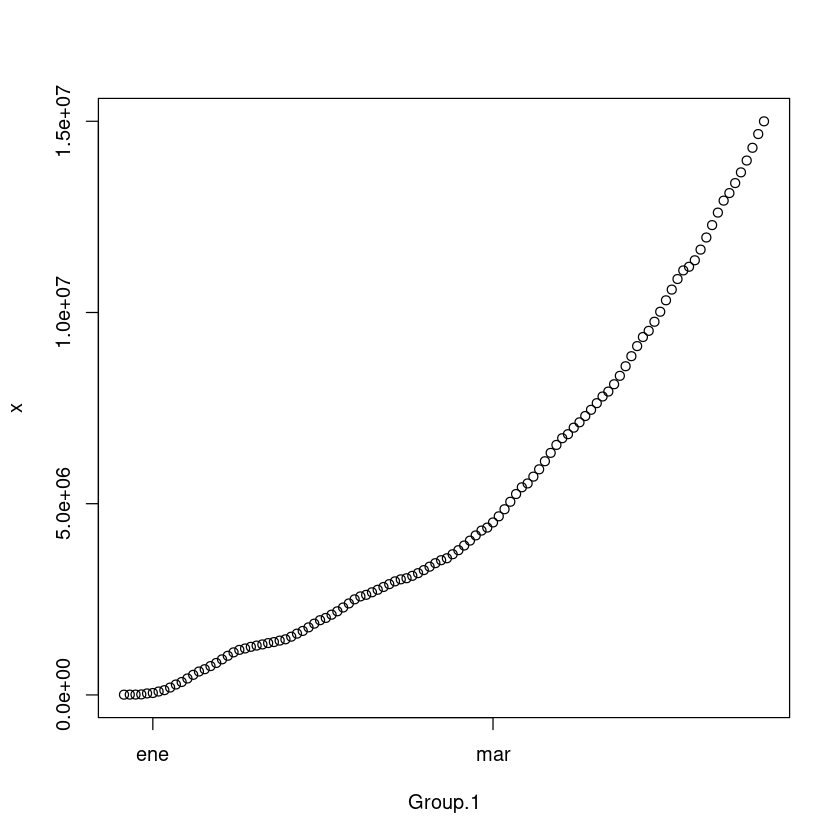

In [24]:
brand_shots('Italy')

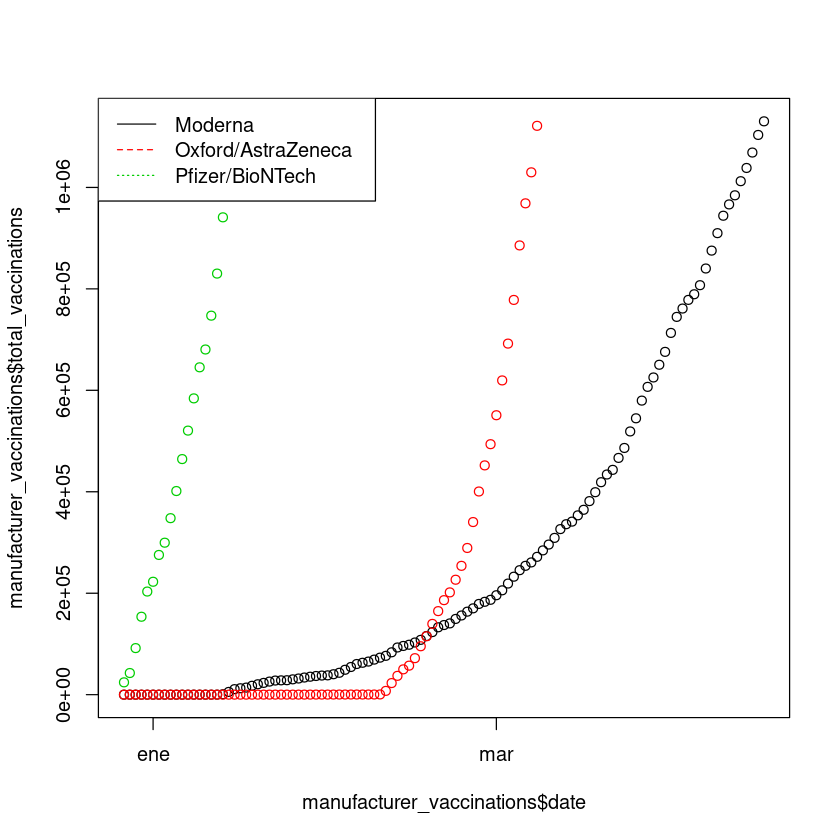

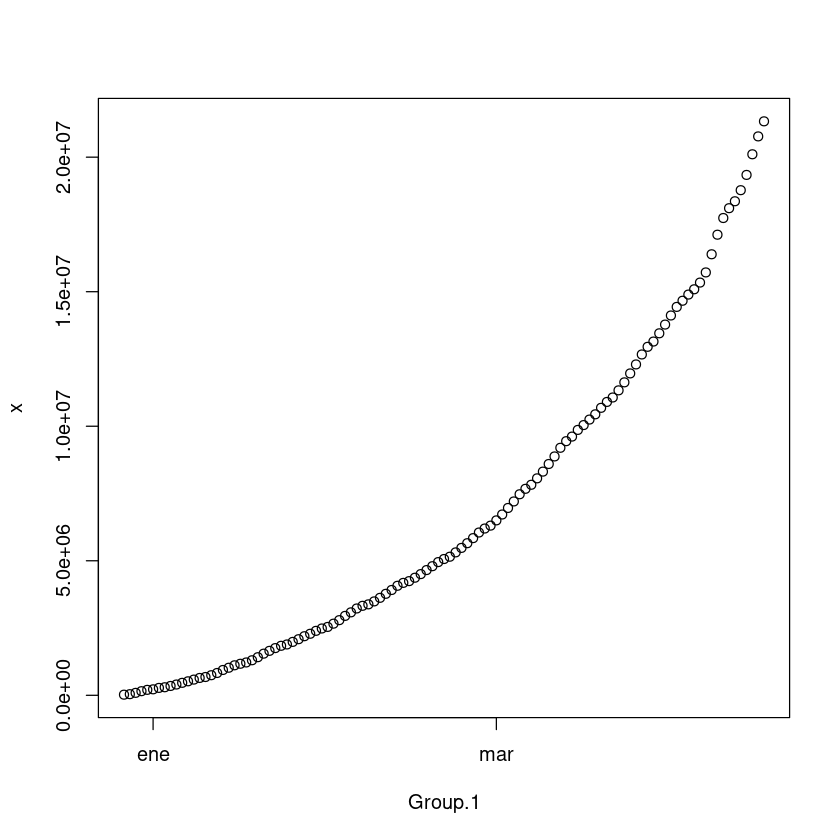

In [25]:
brand_shots('Germany')

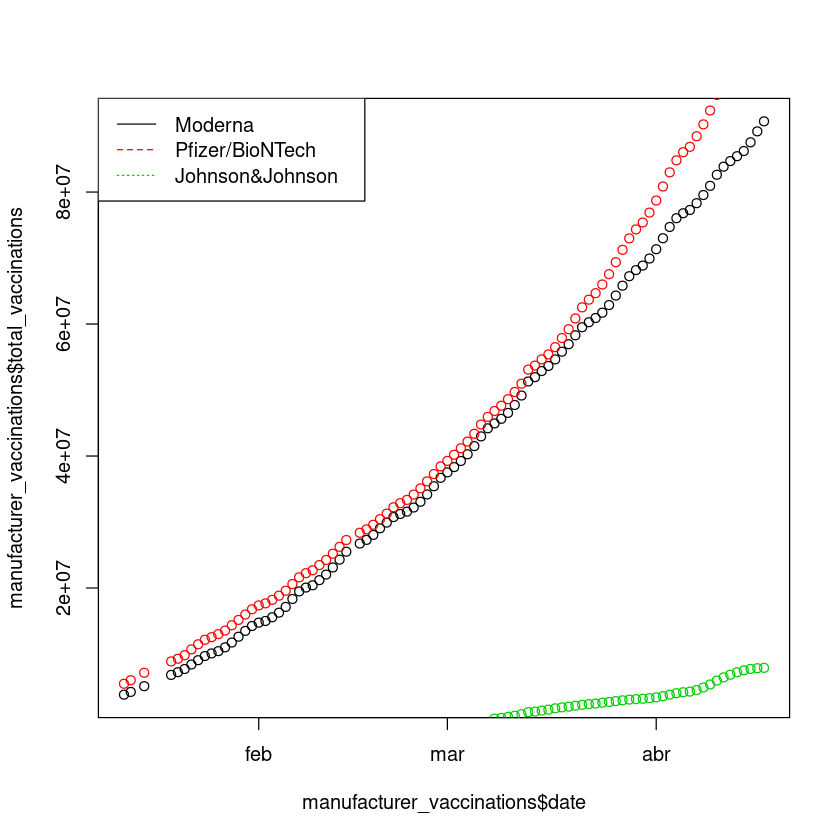

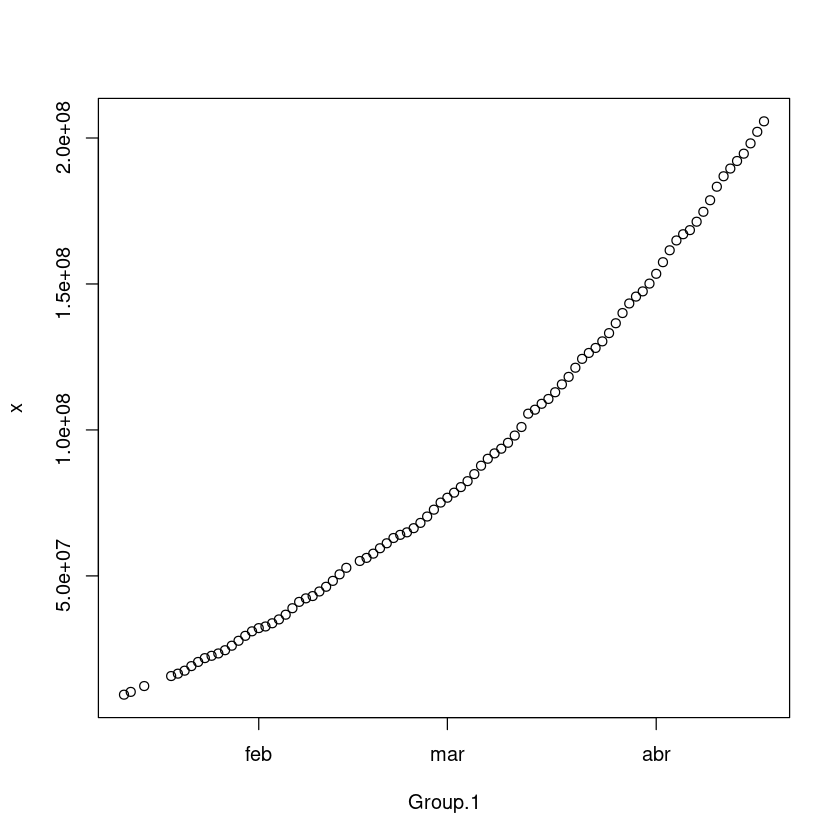

In [26]:
brand_shots('United States')

In [27]:
vaccinations <- read_csv("https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/vaccinations/vaccinations.csv")
vaccinations


── Column specification ────────────────────────────────────────────────────────
cols(
  location = col_character(),
  iso_code = col_character(),
  date = col_date(format = ""),
  total_vaccinations = col_double(),
  people_vaccinated = col_double(),
  people_fully_vaccinated = col_double(),
  daily_vaccinations_raw = col_double(),
  daily_vaccinations = col_double(),
  total_vaccinations_per_hundred = col_double(),
  people_vaccinated_per_hundred = col_double(),
  people_fully_vaccinated_per_hundred = col_double(),
  daily_vaccinations_per_million = col_double()
)




location,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million
<chr>,<chr>,<date>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Afghanistan,AFG,2021-02-22,0,0,NA,NA,NA,0.00,0.00,NA,NA
Afghanistan,AFG,2021-02-23,NA,NA,NA,NA,1367,NA,NA,NA,35
Afghanistan,AFG,2021-02-24,NA,NA,NA,NA,1367,NA,NA,NA,35
Afghanistan,AFG,2021-02-25,NA,NA,NA,NA,1367,NA,NA,NA,35
Afghanistan,AFG,2021-02-26,NA,NA,NA,NA,1367,NA,NA,NA,35
Afghanistan,AFG,2021-02-27,NA,NA,NA,NA,1367,NA,NA,NA,35
Afghanistan,AFG,2021-02-28,8200,8200,NA,NA,1367,0.02,0.02,NA,35
Afghanistan,AFG,2021-03-01,NA,NA,NA,NA,1580,NA,NA,NA,41
Afghanistan,AFG,2021-03-02,NA,NA,NA,NA,1794,NA,NA,NA,46


In [28]:
# Creating a list of the countries in the European continent
europe <- c('Albania', 'Andorra', 'Armenia', 'Austria', 'Azebaijan', 'Belarus', 'Belgium', 'Bosnia and Herzegovina', 'Bulgaria', 'Croatia', 'Cyprus', 'Czhechia', 'Denmark', 'Estonia', 'Finland', 'France', 'Georgia', 'Germany', 'Greece', 'Hungary', 'Iceland', 'Ireland', 'Italy', 'Kazakhstan', 'Kosovo', 'Latvia', 'Liechtenstein', 'Lithuania', 'Luxembourg', 'Malta', 'Moldova', 'Monaco', 'Montenegro', 'Netherlands', 'North Macedonia', 'Norway', 'Poland', 'Portugal', 'Romania', 'Russia', 'San Marino', 'Serbia', 'Slovakia', 'Slovenia', 'Spain', 'Sweden', 'Switzerland', 'Turkey', 'Ukraine', 'United Kingdom')
europe_vax <- filter(vaccinations, is.element(vaccinations$location, europe))
europe_vax

location,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million
<chr>,<chr>,<date>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Albania,ALB,2021-01-10,0,0,NA,NA,NA,0.00,0.00,NA,NA
Albania,ALB,2021-01-11,NA,NA,NA,NA,64,NA,NA,NA,22
Albania,ALB,2021-01-12,128,128,NA,NA,64,0.00,0.00,NA,22
Albania,ALB,2021-01-13,188,188,NA,60,63,0.01,0.01,NA,22
Albania,ALB,2021-01-14,266,266,NA,78,66,0.01,0.01,NA,23
Albania,ALB,2021-01-15,308,308,NA,42,62,0.01,0.01,NA,22
Albania,ALB,2021-01-16,369,369,NA,61,62,0.01,0.01,NA,22
Albania,ALB,2021-01-17,405,405,NA,36,58,0.01,0.01,NA,20
Albania,ALB,2021-01-18,447,447,NA,42,55,0.02,0.02,NA,19


In [29]:
# The total number of people in europe (in millions of people) can be estimated as,
# the sum of daily_vaccinations/daily_vaccinations_per_million over all countries in a date (this date is not necessarily the same).
# For simplicity, we sum this quantity for each date, and take the maximum value resulting from this quotient.
for_agg <- drop_na(europe_vax)
n_europeans <- max(aggregate(for_agg[,8]/for_agg[,12], by = list(for_agg$date), sum)$daily_vaccinations)
message('There are approximately ', round(n_europeans,0), ' millions of people in Europe')
n_europeans <- n_europeans*1000000

There are approximately 772 millions of people in Europe



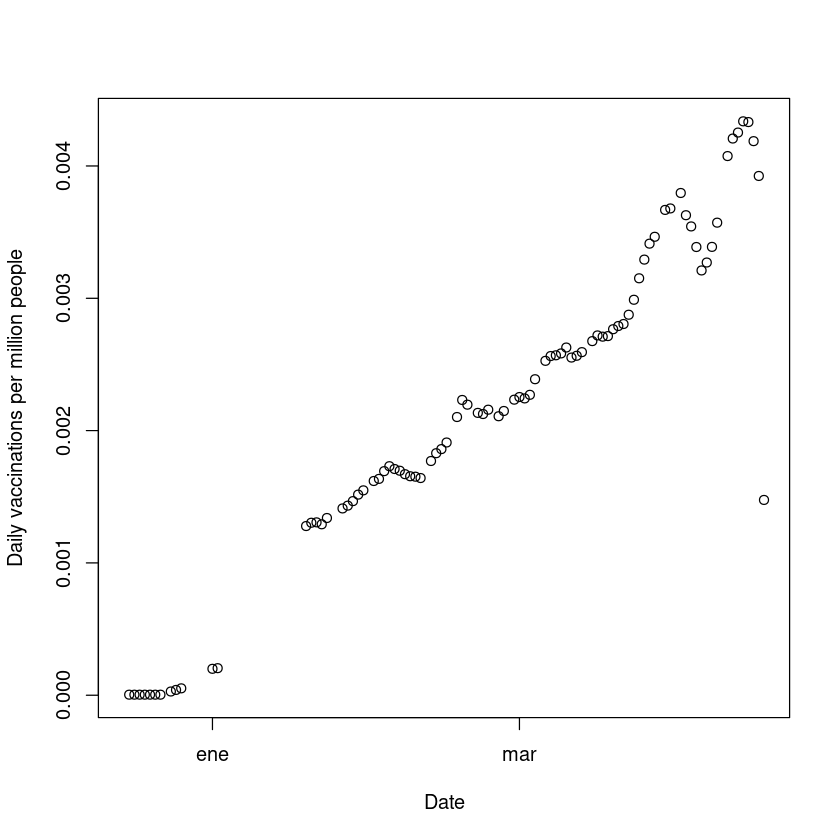

In [30]:
# Now we can plot how many people have been vaccinated daily per million people in all of Europe:
daily_vax <- aggregate(europe_vax$daily_vaccinations/n_europeans, by = list(europe_vax$date), sum)
names(daily_vax) <- c('Date', 'Daily vaccinations per million people')
plot(daily_vax)

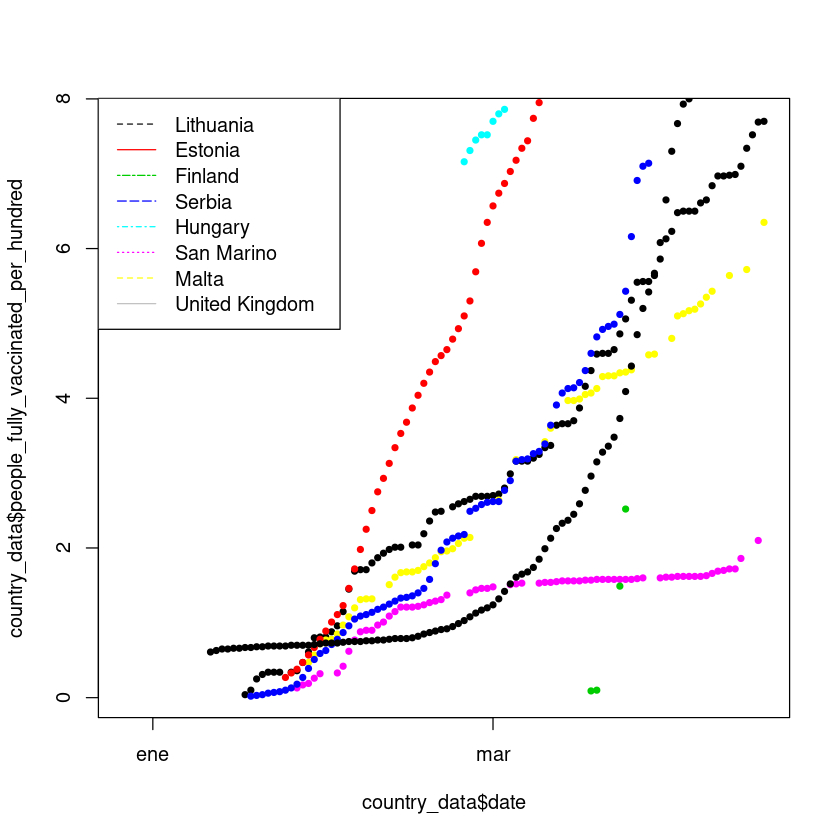

In [31]:
# An interesting plot could be the total people fully vaccinated per hundred for each country.
# For display purposes, we choose the first 8 countries with more total vaccinations per capita:
bound = 8
#removing na's
not_na <- drop_na(europe_vax)
#Getting the maximum percapita total vaccinations per country
max_max <- aggregate(not_na$people_vaccinated_per_hundred, by = list(not_na$location), max)
#sorted countries
europa <- max_max$Group.1[order(max_max$x, decreasing = TRUE)]

colors <- palette()[1:bound]

# Initializing plot
country_data <- filter(europe_vax, location == europa[bound])
plot(country_data$date,country_data$people_fully_vaccinated_per_hundred, col = colors[1], lty= 1, pch = 20)
for (i in (bound-1):1){
    country_data <- filter(europe_vax, location == europa[i])
    country_data <- drop_na(country_data)
    points(country_data$date,country_data$people_fully_vaccinated_per_hundred, , col = colors[i], lty = i, pch = 20)
}
legend("topleft",legend = europa[bound:1], col = colors, lty = bound:1)